In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Bases a processar
bases = [
    'VGG16_256_AVG.csv',
    'VGG16_256_MAX.csv',
    'VGG19_128_AVG.csv',
    'VGG19_128_MAX.csv',
    'VGG19_256_AVG.csv',
    'VGG19_256_MAX.csv',
    'VGG16_256_AVG_PCA.csv',
    'VGG16_256_MAX_PCA.csv',
    'VGG19_128_AVG_PCA.csv',
    'VGG19_128_MAX_PCA.csv',
    'VGG19_256_AVG_PCA.csv',
    'VGG19_256_MAX_PCA.csv'
]

resultados = []
matrizes_confusao = {}

for base_path in bases:
    try:
        df = pd.read_csv(base_path, encoding='utf-8')
        X, y = df.iloc[:, :-1], df['classe']

        print(f'\n📂 Base: {base_path}')
        for depth in range(2, 11):
            dtc = DecisionTreeClassifier(criterion='entropy', max_depth=depth)

            # Divisão 70% treino / 30% teste (estratificado)
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=1, stratify=y
            )

            # Treinar e testar
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)

            # Métricas
            acc = round(accuracy_score(y_test, y_pred) * 100, 2)
            cm = confusion_matrix(y_test, y_pred)
            matrizes_confusao[(base_path, depth)] = cm

            print(f'  max_depth={depth:>2} → Acurácia: {acc:.2f}%')

            resultados.append({
                'Base'          : base_path,
                'max_depth'     : depth,
                'Acuracia'      : acc
            })

    except Exception as e:
        print(f'⚠️  Erro ao processar {base_path}: {e}')

# Salvar resultados
df_res = pd.DataFrame(resultados)
df_res.to_csv('Resultados_DecisionTree_holdout.csv', index=False)
print('\n✅ CSV salvo: Resultados_DecisionTree_holdout.csv')

# Salvar matrizes de confusão
with open('Matrizes_Confusao_Holdout.txt', 'w') as f:
    for (base, depth), cm in matrizes_confusao.items():
        f.write(f'\nBase: {base} | max_depth={depth}\n')
        f.write(np.array2string(cm))
        f.write('\n')
print('✅ Matrizes de confusão salvas em Matrizes_Confusao_Holdout.txt')



📂 Base: VGG16_256_AVG.csv
  max_depth= 2 → Acurácia: 87.50%
  max_depth= 3 → Acurácia: 92.08%
  max_depth= 4 → Acurácia: 90.42%
  max_depth= 5 → Acurácia: 88.75%
  max_depth= 6 → Acurácia: 89.17%
  max_depth= 7 → Acurácia: 87.92%
  max_depth= 8 → Acurácia: 91.67%
  max_depth= 9 → Acurácia: 89.58%
  max_depth=10 → Acurácia: 91.67%

📂 Base: VGG16_256_MAX.csv
  max_depth= 2 → Acurácia: 90.83%
  max_depth= 3 → Acurácia: 91.25%
  max_depth= 4 → Acurácia: 92.08%
  max_depth= 5 → Acurácia: 91.25%
  max_depth= 6 → Acurácia: 92.50%
  max_depth= 7 → Acurácia: 92.08%
  max_depth= 8 → Acurácia: 92.08%
  max_depth= 9 → Acurácia: 93.33%
  max_depth=10 → Acurácia: 93.33%

📂 Base: VGG19_128_AVG.csv
  max_depth= 2 → Acurácia: 81.25%
  max_depth= 3 → Acurácia: 80.83%
  max_depth= 4 → Acurácia: 82.08%
  max_depth= 5 → Acurácia: 82.50%
  max_depth= 6 → Acurácia: 85.83%
  max_depth= 7 → Acurácia: 83.75%
  max_depth= 8 → Acurácia: 85.00%
  max_depth= 9 → Acurácia: 85.83%
  max_depth=10 → Acurácia: 86.67%



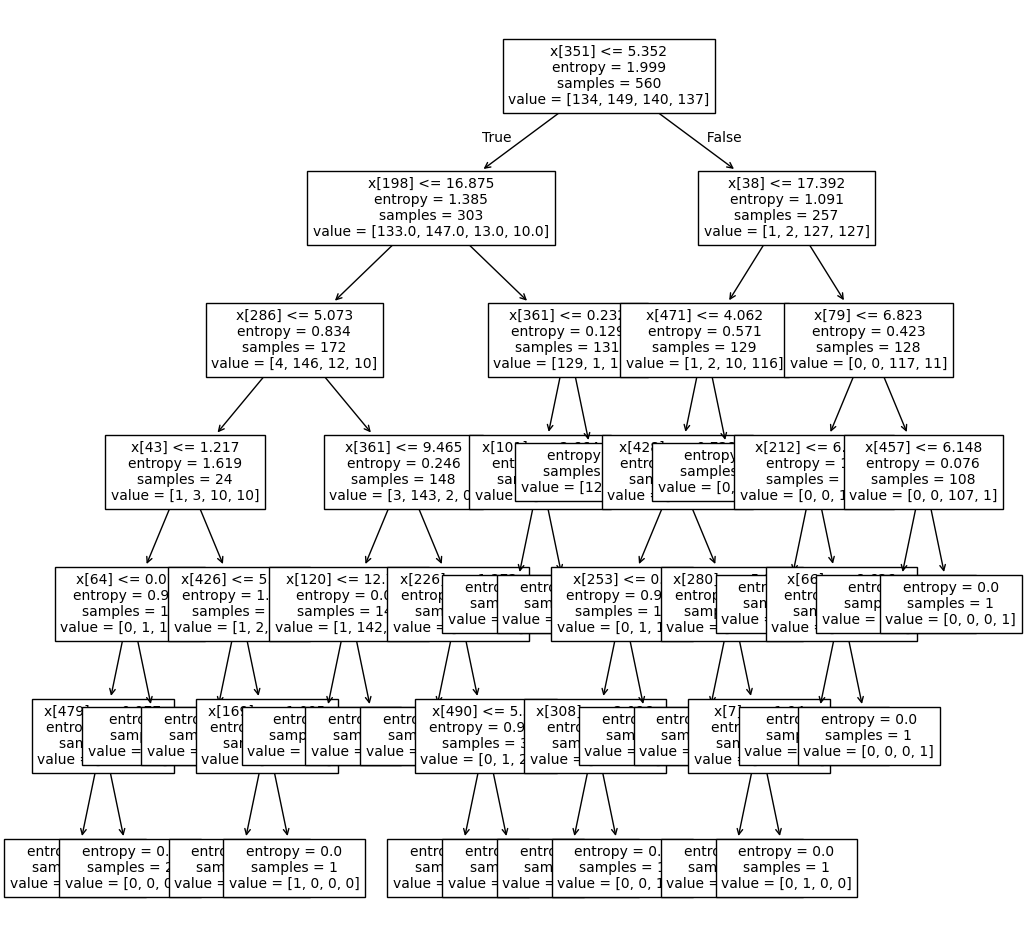

array([[59,  5,  1,  1],
       [ 2, 48,  0,  1],
       [ 0,  5, 45, 10],
       [ 0,  0,  9, 54]])

In [ ]:
# Mostrando (plotando) a árvore gerada
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(dtc, fontsize=10)
plt.show()

# Matriz de confusão p/ 30%
confusion_matrix(y_test, y_pred)